In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import neighbors
from sklearn import linear_model

In [3]:
data = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-3/Lesson 3/bank/bank.csv')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


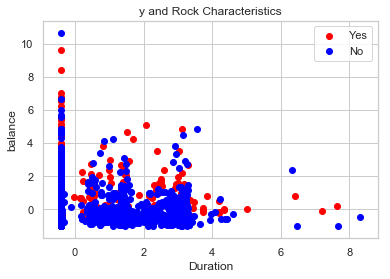

In [29]:
# Look at our data.
data.duration = data.duration.apply(lambda x: float(x))
data.balance  = data.duration.apply(lambda x: float(x))
data['day']       = stats.zscore(data.day)
data['duration']  =  stats.zscore(data.duration)
data['balance']   =  stats.zscore(data.balance)
data['pdays']      =  stats.zscore(data.pdays)

plt.scatter(
    data[data['y'] == 'yes'].pdays,
    data[data['y'] == 'yes'].duration,
    color='red'
)
plt.scatter(
    data[data['y'] == 'no'].pdays,
    data[data['y'] == 'no'].duration,
    color='blue'
)
plt.legend(['Yes', 'No'])
plt.title('y and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('balance')
plt.show()

In [36]:
y = np.where(data['y']=='yes',1,0)


In [87]:
X = pd.DataFrame({
    'pdays': data['pdays'],
    'duration': data['duration']
})


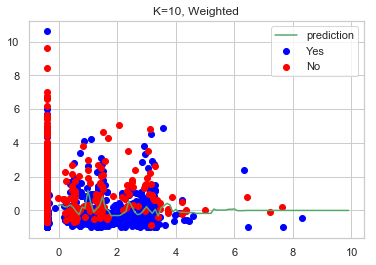

,pdays
0,-0.407218
1,2.989044
2,2.899143
3,-0.407218
4,-0.407218
5,1.360836
6,2.899143
7,-0.407218
8,-0.407218
9,1.071155


In [89]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
ZZ = pd.DataFrame()
WW = pd.DataFrame()

ZZ['duration'] = X.duration
WW['pdays'] = X.pdays
knn.fit(WW, ZZ)

# Set up our prediction line.
T = np.arange(0, 10, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.scatter(
    data[data['y'] == 'no'].pdays,
    data[data['y'] == 'no'].duration,
    color='blue'
)
plt.scatter(
    data[data['y'] == 'yes'].pdays,
    data[data['y'] == 'yes'].duration,
    color='red'
)

plt.plot(T, Y_, c='g', label='prediction')
plt.legend(['prediction','Yes', 'No'])
plt.title('K=10, Weighted')
plt.show()
WW

Coefficients: 
 [[0.01038024]]
Intercept: 
 [-2.65791121e-18]


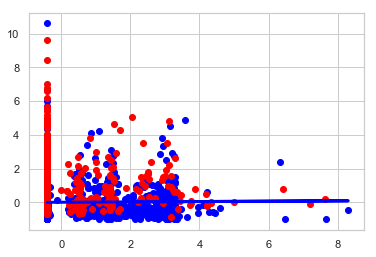

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [95]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(WW, ZZ)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

plt.scatter(
    data[data['y'] == 'no'].pdays,
    data[data['y'] == 'no'].duration,
    color='blue'
)
plt.scatter(
    data[data['y'] == 'yes'].pdays,
    data[data['y'] == 'yes'].duration,
    color='red'
)
plt.plot(WW, regr.predict(WW), color='blue', linewidth=3)
plt.show()
